## Chatbots with Langraph

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 1.7 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Successfully uninstalled msgpack-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.2 requires cubinlinker, which is not installed.
cudf 24.8.2 requires cupy-cuda11x

In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 6.8 MB/s eta 0:00:00


In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
langchain = user_secrets.get_secret("for my project")
groq_api_key = user_secrets.get_secret("groq_api1")

In [4]:
import os 
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="LiveLangGraph"
os.environ["LANGCHAIN_API_KEY"]=langchain

In [5]:
from langchain_groq import ChatGroq

In [6]:
llm = ChatGroq(
    api_key = groq_api_key,
    model_name = "llama3-8b-8192"
)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7c9a38f56710>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7c9a38f55780>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Building Chatbot Using LangGraph

In [7]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
    #Messages that have the type "List".The "add_messages" function 
        #In this annotation defines how this state key should be updated
        # (in this case ,it appends messages to the list),rather than overwriting them
    messages:Annotated[list,add_messages]
    
graph_builder=StateGraph(State)

In [13]:
graph_builder

In [14]:
def chatbot(state:State):
    return{"messages":llm.invoke(state['messages'])}


In [15]:
graph_builder.add_node("chatbot",chatbot)

In [16]:
graph_builder

In [18]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [20]:
graph=graph_builder.compile()

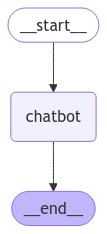

In [21]:
#for displaying the graph
from IPython.display import Image,display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [26]:
while True:
    user_input=input("User: ")#user giving an input
    if user_input.lower() in ["quit","q"]:#if not giving input quit using q 
        print("Good Bye")
        break
    for event in graph.stream({'messages':("user",user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant",value["messages"].content)

User:  Hello


dict_values([{'messages': AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.021666667, 'prompt_time': 0.00111688, 'queue_time': 0.013594489, 'total_time': 0.022783547}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_a97cfe35ae', 'finish_reason': 'stop', 'logprobs': None}, id='run-e1522c60-fb7e-4636-8aba-c15a78417381-0', usage_metadata={'input_tokens': 11, 'output_tokens': 26, 'total_tokens': 37})}])
content="Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 11, 'total_tokens': 37, 'completion_time': 0.021666667, 'prompt_time': 0.00111688, 'queue_time': 0.013594489, 'total_time': 0.022783547}, 'model_name': 'llama3-8b-8192',

User:  q


Good Bye
